In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

filepath = r"ElectionDataAlone.csv"

# Read the dataset
data= pd.read_csv(filepath)

# Printing the data
data.head()

,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,...,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,Adair,IA,Midwest,19001,1/3/2008,Caucuses,75.0,22.0,24.0,96.7,...,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714,13.5,570.0,373.0
1,Adams,IA,Midwest,19003,1/3/2008,Caucuses,50.0,18.0,7.0,96.8,...,26032.0,720.0,78.0,1829.0,74.7,65.4,4192,9.9,425.0,238.0
2,Allamakee,IA,Midwest,19005,1/3/2008,Caucuses,80.0,25.0,33.0,104.5,...,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796,23.1,659.0,326.0
3,Appanoose,IA,Midwest,19007,1/3/2008,Caucuses,60.0,17.0,10.0,94.0,...,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422,27.0,516.0,236.0
4,Audubon,IA,Midwest,19009,1/3/2008,Caucuses,48.0,16.0,17.0,94.7,...,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278,14.2,444.0,261.0


In [2]:
#impute missing variables with average of each column
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer = imputer.fit(data.iloc[:,6:])

data.iloc[:,6:] = imputer.transform(data.iloc[:,6:])

In [3]:
data['ElectionDate'] = pd.to_datetime(data.ElectionDate)

In [4]:
#creating two datasets
dataTrain = data[data.ElectionDate < '2/19/2008']
dataTest = data[data.ElectionDate >= '2/19/2008']

print("Train set size: ", dataTrain.shape)
print("Test set size: ", dataTest.shape)
dataTrain.head()

Train set size:  (1737, 41)
Test set size:  (1131, 41)


,County,State,Region,FIPS,ElectionDate,ElectionType,TotalVote,Clinton,Obama,MalesPer100Females,...,SocialSecurityRate,RetiredWorkers,Disabilities,DisabilitiesRate,Homeowner,SameHouse1995and2000,Pop,PopDensity,LandArea,FarmArea
0,Adair,IA,Midwest,19001,2008-01-03,Caucuses,75.0,22.0,24.0,96.7,...,23222.0,1230.0,90.0,1145.0,75.0,66.0,7714.0,13.5,570.0,373.0
1,Adams,IA,Midwest,19003,2008-01-03,Caucuses,50.0,18.0,7.0,96.8,...,26032.0,720.0,78.0,1829.0,74.7,65.4,4192.0,9.9,425.0,238.0
2,Allamakee,IA,Midwest,19005,2008-01-03,Caucuses,80.0,25.0,33.0,104.5,...,22231.0,2245.0,186.0,1265.0,76.4,64.1,14796.0,23.1,659.0,326.0
3,Appanoose,IA,Midwest,19007,2008-01-03,Caucuses,60.0,17.0,10.0,94.0,...,24989.0,2050.0,453.0,3315.0,74.0,60.2,13422.0,27.0,516.0,236.0
4,Audubon,IA,Midwest,19009,2008-01-03,Caucuses,48.0,16.0,17.0,94.7,...,26947.0,1150.0,79.0,1223.0,79.2,70.4,6278.0,14.2,444.0,261.0


In [5]:
#create new column with percent votes for Obama (and some other variable that might be of interest)
dataTrain['ObamaMargin'] = dataTrain.Obama - dataTrain.Clinton
dataTrain['ObamaMarginPercent'] = dataTrain.ObamaMargin / dataTrain.TotalVote # multiply by 100 to get percent
#dataTrain['ObamaWins'] = dataTrain.ObamaMargin.apply(lambda x: 1 if x > 0 else 0)
dataTrain['ObamaWins'] = np.where(dataTrain.ObamaMargin > 0, 1, 0)

#verify that new columns have been created
dataTrain.columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Index(['County', 'State', 'Region', 'FIPS', 'ElectionDate', 'ElectionType',
       'TotalVote', 'Clinton', 'Obama', 'MalesPer100Females', 'AgeBelow35',
       'Age35to65', 'Age65andAbove', 'White', 'Black', 'Asian',
       'AmericanIndian', 'Hawaiian', ' Hispanic', 'HighSchool', 'Bachelors',
       'Poverty', 'IncomeAbove75K    ', 'MedianIncome', 'AverageIncome',
       'UnemployRate', 'ManfEmploy', 'SpeakingNonEnglish', 'Medicare',
       'MedicareRate', 'SocialSecurity', 'SocialSecurityRate',
       'RetiredWorkers', 'Disabilities', 'DisabilitiesRate', 'Homeowner',
       'SameHouse1995and2000', 'Pop', 'PopDensity', 'LandArea', 'FarmArea',
       'ObamaMargin', 'ObamaMarginPercent', 'ObamaWins'],
      dtype='object')

In [6]:
# Descriptive stats with applying some formatting for easy reading
with pd.option_context('float_format', '{:,.2f}'.format): 
    print(dataTrain.describe())

           FIPS    TotalVote    Clinton      Obama  MalesPer100Females  \
count  1,737.00     1,737.00   1,737.00   1,737.00            1,737.00   
mean  25,907.72    12,863.80   5,973.74   6,178.12               99.25   
std   15,270.20    53,071.88  25,402.03  27,477.23                9.79   
min    1,001.00        13.00       4.00       4.00               76.20   
25%   13,157.00       732.00     329.00     254.00               94.90   
50%   25,007.00     2,330.00   1,106.00     878.00               97.60   
75%   36,095.00     6,418.00   3,200.00   2,749.00              100.70   
max   53,077.00 1,413,869.00 771,700.00 743,686.00              200.90   

       AgeBelow35  Age35to65  Age65andAbove    White    Black  ...  \
count    1,737.00   1,737.00       1,737.00 1,737.00 1,737.00  ...   
mean        45.76      39.49          14.76    85.49    11.07  ...   
std          5.52       3.41           4.03    15.92    15.53  ...   
min         29.10      18.60           2.20    15.70 

In [7]:
# Lets create a copy of the data
dropFromData = ["County","FIPS","ObamaMargin","ObamaWins","Obama","Clinton","TotalVote"]
election_data = dataTrain.drop(dropFromData, axis = 1)

In [8]:
dataTrain.columns

Index(['County', 'State', 'Region', 'FIPS', 'ElectionDate', 'ElectionType',
       'TotalVote', 'Clinton', 'Obama', 'MalesPer100Females', 'AgeBelow35',
       'Age35to65', 'Age65andAbove', 'White', 'Black', 'Asian',
       'AmericanIndian', 'Hawaiian', ' Hispanic', 'HighSchool', 'Bachelors',
       'Poverty', 'IncomeAbove75K    ', 'MedianIncome', 'AverageIncome',
       'UnemployRate', 'ManfEmploy', 'SpeakingNonEnglish', 'Medicare',
       'MedicareRate', 'SocialSecurity', 'SocialSecurityRate',
       'RetiredWorkers', 'Disabilities', 'DisabilitiesRate', 'Homeowner',
       'SameHouse1995and2000', 'Pop', 'PopDensity', 'LandArea', 'FarmArea',
       'ObamaMargin', 'ObamaMarginPercent', 'ObamaWins'],
      dtype='object')

# Dataset preparation

In [150]:
X=dataTrain[['MalesPer100Females', 'AgeBelow35',
       'Age35to65', 'Age65andAbove', 'White', 'Black', 'Asian',
       'AmericanIndian', 'Hawaiian', ' Hispanic', 'HighSchool', 'Bachelors',
       'Poverty', 'IncomeAbove75K    ', 'MedianIncome', 'AverageIncome',
       'UnemployRate', 'ManfEmploy', 'SpeakingNonEnglish', 'Medicare',
       'MedicareRate', 'SocialSecurity', 'SocialSecurityRate',
       'RetiredWorkers', 'Disabilities', 'DisabilitiesRate', 'Homeowner',
       'SameHouse1995and2000', 'PopDensity', 'LandArea', 'FarmArea']]
y=dataTrain['ObamaMarginPercent']

# Predicting by LinearRegression model

In [151]:
from sklearn.model_selection import train_test_split #split data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score

In [153]:
reg=LinearRegression()

In [154]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
pred=reg.predict(X_test)

Text(0, 0.5, 'prediction')

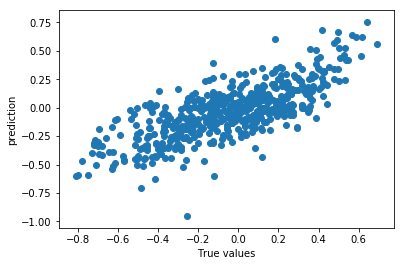

In [156]:
plt.scatter(y_test,pred)
plt.xlabel('True values')
plt.ylabel('prediction')

In [157]:
from sklearn import metrics
print('MAE1:', metrics.mean_absolute_error(y_test, pred))#Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('MSE1:', metrics.mean_squared_error(y_test, pred))#Mean Squared Error (MSE) is the mean of the squared errors
print('RMSE1:', np.sqrt(metrics.mean_squared_error(y_test, pred)))#Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

reg.score(X_test, y_test)

MAE1: 0.15909735684334533
MSE1: 0.04086172241604253
RMSE1: 0.20214282677365164


0.5582276581597991

In [142]:
X=dataTrain[['White', 'Black', 'Asian',
       'AmericanIndian', 'Hawaiian', ' Hispanic']]
y=dataTrain['ObamaMarginPercent']

MAE2: 0.1566070609613051
MSE2: 0.039857844066965444
RMSE2: 0.19964429385025118


0.5690809864820616

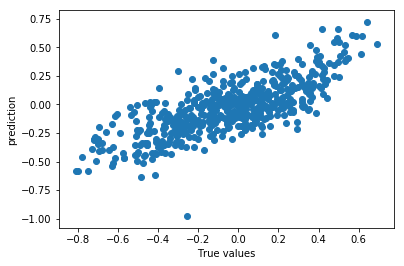

In [220]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
plt.scatter(y_test,pred)
plt.xlabel('True values')
plt.ylabel('prediction')
print('MAE2:', metrics.mean_absolute_error(y_test, pred))
print('MSE2:', metrics.mean_squared_error(y_test, pred))
print('RMSE2:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
r2_score(y_test, pred)

In [221]:
X=dataTrain[['HighSchool', 'Bachelors',
       'Poverty','IncomeAbove75K    ', 'AverageIncome', 'LandArea', 'FarmArea']]
y=dataTrain['ObamaMarginPercent']

MAE3: 0.22298584204147853
MSE3: 0.07534568226406416
RMSE3: 0.27449167977201816


0.18540784545403333

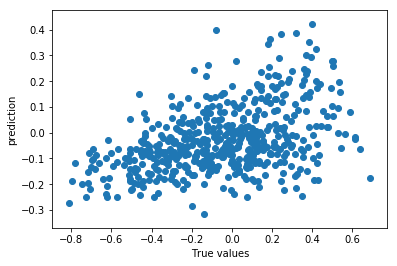

In [222]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
plt.scatter(y_test,pred)
plt.xlabel('True values')
plt.ylabel('prediction')
print('MAE3:', metrics.mean_absolute_error(y_test, pred))
print('MSE3:', metrics.mean_squared_error(y_test, pred))
print('RMSE3:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
r2_score(y_test, pred)

In [223]:
X=dataTrain[['Medicare',
       'MedicareRate', 'SocialSecurity', 'SocialSecurityRate', 'Disabilities', 'DisabilitiesRate', 'Homeowner',
       'SameHouse1995and2000', 'PopDensity']]
y=dataTrain[['ObamaMarginPercent']]

MAE4: 0.2319570210241273
MSE4: 0.08142717719604166
RMSE4: 0.28535447639040407


0.11965838363168435

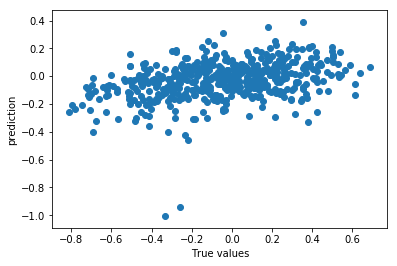

In [224]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
plt.scatter(y_test,pred)
plt.xlabel('True values')
plt.ylabel('prediction')
print('MAE4:', metrics.mean_absolute_error(y_test, pred))
print('MSE4:', metrics.mean_squared_error(y_test, pred))
print('RMSE4:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
r2_score(y_test, pred)

# 

In [158]:
from sklearn.model_selection import KFold

In [161]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
      print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# PCA

In [214]:
from sklearn.decomposition import PCA #import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(dataTrain[['White','Asian',
       'AmericanIndian', 'Hawaiian', ' Hispanic']])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

In [216]:
dataTrain[['White','Asian',
       'AmericanIndian', 'Hawaiian', ' Hispanic']].shape,principalDf.shape

((1737, 5), (1737, 1))

In [ ]:
#create new dataset by concating our new features... created by PCA model

In [218]:
finalDf = pd.concat([principalDf,dataTrain[['MalesPer100Females', 'AgeBelow35', 
       'Age35to65', 'Age65andAbove', 'Black', 'HighSchool', 'Bachelors',
       'Poverty', 'IncomeAbove75K    ', 'MedianIncome', 'AverageIncome',
       'UnemployRate', 'ManfEmploy', 'SpeakingNonEnglish', 'Medicare',
       'MedicareRate', 'SocialSecurity', 'SocialSecurityRate',
       'RetiredWorkers', 'Disabilities', 'DisabilitiesRate', 'Homeowner',
       'SameHouse1995and2000', 'PopDensity', 'LandArea', 'FarmArea','ObamaMarginPercent']]], axis = 1)

# Testing new features by predicting

MAE4: 0.1566070609613051
MSE4: 0.039857844066965444
RMSE4: 0.19964429385025118


0.5690809864820616

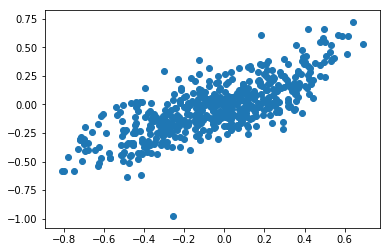

In [219]:
X=finalDf.drop('ObamaMarginPercent',axis=1)
y=dataTrain['ObamaMarginPercent']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
plt.scatter(y_test,pred)
print('MAE4:', metrics.mean_absolute_error(y_test, pred))
print('MSE4:', metrics.mean_squared_error(y_test, pred))
print('RMSE4:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
r2_score(y_test, pred)

# Visualization

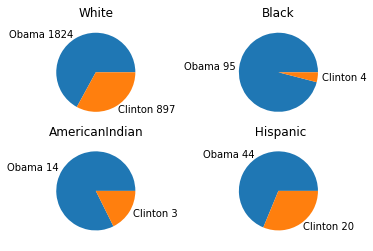

In [211]:
fig = plt.figure()
arr = ['White', 'Black', 'Asian', 'AmericanIndian', 'Hawaiian', ' Hispanic']
j = 0
for i in range(len(arr)):
    BlackVoteData = data[data[arr[i]]>50]
    BlackVoteData1 = BlackVoteData[BlackVoteData['Obama']>BlackVoteData['Clinton']]
    BlackVoteData2 = BlackVoteData[BlackVoteData['Obama']<BlackVoteData['Clinton']]
    BlackVoteData1.count()
    BlackVoteData2.count()
    count = [BlackVoteData1.Obama.count(),BlackVoteData2.Obama.count()]
    if count != [0, 0]:
        ax = fig.add_subplot(2,2,j+1)
        ax.set_title(arr[i])
        ax.pie(count,labels=[str('Obama '+str(count[0])),str('Clinton '+str(count[1]))])
        j+=1
plt.show()



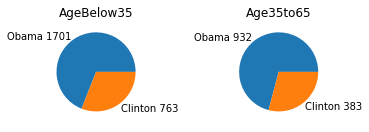

In [209]:
fig = plt.figure()
arr = ['AgeBelow35','Age35to65', 'Age65andAbove']
j = 0
for i in range(len(arr)):
    ageData = data[data[arr[i]]>40]
    BlackVoteData1 = ageData[ageData['Obama']>ageData['Clinton']]
    BlackVoteData2 = ageData[ageData['Obama']<ageData['Clinton']]
    BlackVoteData1.count()
    BlackVoteData2.count()
    count = [BlackVoteData1.Obama.count(),BlackVoteData2.Obama.count()]
    if count != [0, 0]:
        ax = fig.add_subplot(2,2,j+1)
        ax.set_title(arr[i])
        ax.pie(count,labels=[str('Obama '+str(count[0])),str('Clinton '+str(count[1]))])
        j+=1
plt.show()

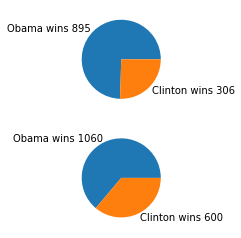

In [210]:
moreincome = data[data['AverageIncome']> data.AverageIncome.mean()]
lessincome = data[data['AverageIncome']< data.AverageIncome.mean()]
voteData1 = moreincome[moreincome['Obama']>moreincome['Clinton']]
voteData2 = moreincome[moreincome['Obama']<moreincome['Clinton']]
voteData3 = lessincome[lessincome['Obama']>lessincome['Clinton']]
voteData4 = lessincome[lessincome['Obama']<lessincome['Clinton']]
count1 = [voteData1.Obama.count(),voteData2.Obama.count()]
count2 = [voteData3.Obama.count(),voteData4.Obama.count()]

fig, (ax, ax2) = plt.subplots(2)
ax.pie(count1,labels=['Obama wins '+str(count1[0]),'Clinton wins '+str(count1[1])])
ax2.pie(count2,labels=['Obama wins '+str(count2[0]),'Clinton wins '+str(count2[1])])
plt.show()


Text(0.5, 1.0, "How Obama's margin changed by Regions")

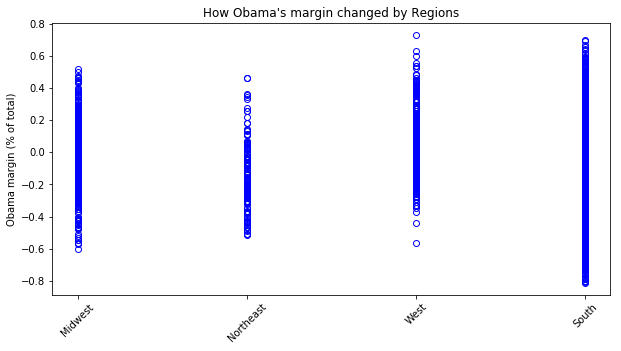

In [225]:
#Obama's margin changed by Regions
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10,5))
plt.plot(dataTrain.Region, dataTrain.ObamaMarginPercent, 'o', fillstyle='none', color='blue');
plt.xticks(rotation='45')
plt.ylabel('Obama margin (% of total)')
plt.title("How Obama's margin changed by Regions")